In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from neuralnet.fc_net import *
from neuralnet.data_utils import get_CIFAR10_data
from neuralnet.gradient_check import eval_numerical_gradient
from neuralnet.gradient_check import eval_numerical_gradient_array
from neuralnet.solver import Solver
from neuralnet.layers import relu_forward, relu_backward, svm_loss, softmax_loss

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)    # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

WORKING_DIR = "/user1/student/mtc/mtc2018/mtc1807/SEM3/NNA/assignment2/"

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting the data

In [5]:
data = get_CIFAR10_data(dir_path=WORKING_DIR)
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_test:  (1000,)


## Affine layer : forward

In [6]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])


print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.7698500479884e-10


## Affine layer : backward

In [7]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)


print( 'Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  4.3067790291214447e-10
dw error:  1.6142091465118907e-10
db error:  2.40678128453444e-11


## ReLU layer: forward

In [8]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])


print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


## ReLU layer: backward

In [9]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.275639206112935e-12


## Sandwich layers

In [10]:
from neuralnet.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward:
dx error:  1.1573668899822017e-10
dw error:  6.224866519082227e-09
db error:  2.548005011123889e-11


## Loss layers: Softmax and SVM

In [11]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.99944554741149
dx error:  8.182894472887002e-10

Testing softmax_loss:
loss:  2.302530079411838
dx error:  9.746376837933184e-09


## Initial loss and gradient

In [12]:
N, D, H1, H2,H3, C = 2, 15, 20, 30,40, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet([H1, H2,H3], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.301913548624503
W1 relative error: 3.62e-07
W2 relative error: 6.08e-06
W3 relative error: 2.98e-05
W4 relative error: 3.45e-06
b1 relative error: 5.50e-08
b2 relative error: 1.35e-07
b3 relative error: 1.49e-08
b4 relative error: 1.03e-10
Running check with reg =  3.14
Initial loss:  11.690707235044691
W1 relative error: 1.87e-08
W2 relative error: 4.48e-07
W3 relative error: 2.69e-07
W4 relative error: 1.20e-07
b1 relative error: 1.37e-07
b2 relative error: 4.01e-08
b3 relative error: 1.40e-08
b4 relative error: 2.87e-10


## Overfitting FC NET - 3 layered

(Iteration 1 / 40) loss: 2.287086
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.139000
(Epoch 1 / 20) train acc: 0.320000; val_acc: 0.145000
(Epoch 2 / 20) train acc: 0.520000; val_acc: 0.163000
(Epoch 3 / 20) train acc: 0.460000; val_acc: 0.173000
(Epoch 4 / 20) train acc: 0.700000; val_acc: 0.173000
(Epoch 5 / 20) train acc: 0.760000; val_acc: 0.175000
(Iteration 11 / 40) loss: 1.098815
(Epoch 6 / 20) train acc: 0.880000; val_acc: 0.178000
(Epoch 7 / 20) train acc: 0.920000; val_acc: 0.211000
(Epoch 8 / 20) train acc: 0.900000; val_acc: 0.186000
(Epoch 9 / 20) train acc: 0.900000; val_acc: 0.151000
(Epoch 10 / 20) train acc: 0.980000; val_acc: 0.196000
(Iteration 21 / 40) loss: 0.472653
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.196000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.193000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.194000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.189000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.190000
(Iteration 31 / 40) loss: 

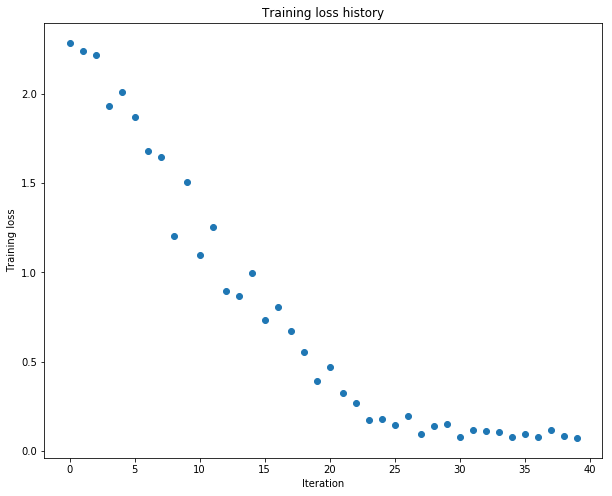

In [13]:
# TODO: Use a three-layer Net to overfit 50 training examples.
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-2
learning_rate = 1e-2
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

## Overfitting FC NET - 5 layered

In [14]:
def run_model(weight_scale,learning_rate):
    model = FullyConnectedNet([100, 100,100,100],
            weight_scale=weight_scale, dtype=np.float64)
    solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                    'learning_rate': learning_rate,
                    }
             )
    solver.train()
    return solver.train_acc_history

(Iteration 1 / 40) loss: 2.596292
(Epoch 0 / 20) train acc: 0.260000; val_acc: 0.125000
(Epoch 1 / 20) train acc: 0.300000; val_acc: 0.125000
(Epoch 2 / 20) train acc: 0.640000; val_acc: 0.147000
(Epoch 3 / 20) train acc: 0.580000; val_acc: 0.127000
(Epoch 4 / 20) train acc: 0.800000; val_acc: 0.192000
(Epoch 5 / 20) train acc: 0.700000; val_acc: 0.155000
(Iteration 11 / 40) loss: 0.966722
(Epoch 6 / 20) train acc: 0.640000; val_acc: 0.173000
(Epoch 7 / 20) train acc: 0.820000; val_acc: 0.163000
(Epoch 8 / 20) train acc: 0.880000; val_acc: 0.158000
(Epoch 9 / 20) train acc: 0.940000; val_acc: 0.167000
(Epoch 10 / 20) train acc: 0.860000; val_acc: 0.169000
(Iteration 21 / 40) loss: 0.844036
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.156000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.164000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.176000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.182000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.175000
(Iteration 31 / 40) loss: 

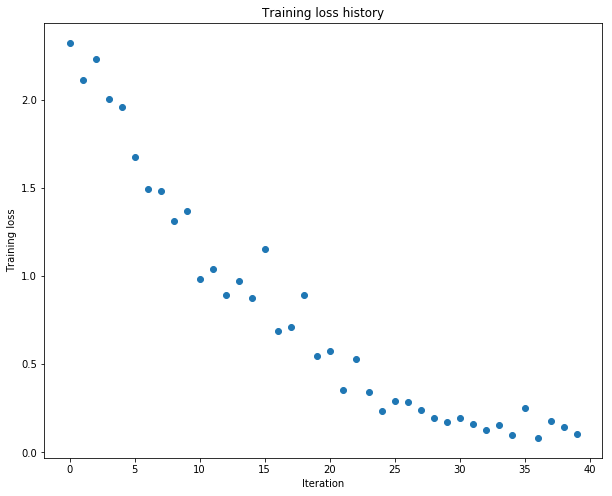

In [19]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

not_reach = True
# while not_reach:
#     weight_scale = 10**(np.random.uniform(-6,-1))
#     learning_rate = 10**(np.random.uniform(-4,-1))
#     train_acc_hist = run_model(weight_scale,learning_rate)
#     if max(train_acc_hist) == 1.0:
#         not_reach = False
#         lr = learning_rate
#         ws = weight_scale
# converges for lr = 0.039890 and ws = 0.039598
weight_scale = 0.039890 
learning_rate = 0.039598
train_acc_hist = run_model(weight_scale,learning_rate)
if max(train_acc_hist) == 1.0:
    not_reach = False
    lr = learning_rate
    ws = weight_scale

print('Has worked with %f and %f'%(lr,ws))
plt.plot(train_acc_hist, 'o')
plt.title('Training Acc history')
plt.xlabel('Iteration')
plt.ylabel('Training Acc')
plt.show()